In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 10
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import datasets # tensorflow가 제공하는 데이터셋을 사용하기 위해 추가
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import  Sequential 
from tensorflow.keras.layers import Dense 

# tensorflow에서 합성곱 신경망(Convolution Neural Network, CNN)을 사용하기 위해 추가
from tensorflow.keras.layers import Conv2D # 신경망에 추가할 합성곱 레이어를 생성하기 위해 import
from tensorflow.keras.layers import MaxPooling2D # 신경망에 추가할 맥스 풀링 레이어를 생성하기 위해 import
from tensorflow.keras.layers import Flatten# 신경망의 최종 출력층에서 벡터 형태를 만들기 위해 import
from tensorflow.keras.layers import Dropout # 신경망에 추가할 드랍 다운 레이어를 생성하기 위해 import

***
합성곱 신경망
***
합성곱 신경망은 흔히 CNN이라고 부르는 방법으로 합성곱이라는 연산을 사용하는 신경망이다.  
CNN은 실제 여러 분야에서 사용되는 방법으로 특히 이미지 분류 작업에서 좋은 성능을 보여준다.  

합성곱 연산은 아래와 같은 연산을 의미한다.

$$y(i) = (x \times w)(i) = \sum_{k=-\infty}^{\infty} x(k)w(i-k)$$

위 식은 i 시점에서의 입력 데이터 x값과 가중치 w값의 합성곱 연산의 결과는 y(i)와 같음을 나타낸다.  
위 수식에서 k도 시점을 의미하는데, 가중치 w의 시점은 w(i)가 아닌 w(i-k)임을 알 수 있다. 이를 플립(flip)이라고 하며 가중치 커널이라고도 부른다. 플립은 우리말로 하면 '뒤집다'라는 뜻으로 가중치의 시점을 뒤집는다는 뜻이다. 위 식은 시점의 순서와 상관없이 결과가 동일하므로 아래와 같이 쓸수도 있다.

$$y(i) = (x \times w)(i) = \sum_{k=-\infty}^{\infty} x(i-k)w(k)$$

***
패딩(Padding)
***
패딩은 입력 데이터 주변을 특정값으로 채우는 것을 말한다.

<img src="./CNN1 (3).png">

신경망에 커널을 적용하면 층이 깊어질수록 데이터의 차원은 점점 줄어든다.  5 x 5 차원의 입력 데이터에 2 * 2 차원의 커널(필터)을 합성곱했을 때 4 x 4차원으로 입력 데이터보다 출력 데이터의 차원이 줄어든다.  
이렇듯 입력 데이터에 커널을 합성곱한 후 출력 데이터의 차원이 줄어드는 현상을 방지하기 위해 패딩이라는 방법을 사용한다.  


***
스트라이드(Stride)
***
스트라이드는 한번 합성곱 연산을 한 후 다음 계산 영역을 선택할 때 얼마나 이동할지 간격을 정하는 것이다.

<img src="./CNN1 (1).png">


스트라이드 2를 적용한 후 합성곱 연산을 한 결과 스트라이드 1일때와 비교해보면 출력 데이터의 차원이 더 적은 것을 알 수 있다.  


***
풀링(Pooling)
***
풀링은 데이터의 차원을 줄이는 방법이다.  

<img src="./CNN1 (2).png" width="500">

맥스 풀링이란 해당 영역에서 가장 큰 값을 선택하는 방법이다.  

***
합성곱 신경망을 이용, 손글씨 인식 모델을 생성해본다.  
***

In [2]:
# 일관된 결과값이 나오도록 numpy와 tensorflow의 seed를 설정한다. 
np.random.seed(0)
tf.random.set_seed(0)

***
CNN 합성곱 신경망에 사용할 데이터 준비
***

In [3]:
print(datasets.mnist.load_data())
print(type(datasets.mnist.load_data()))

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [4]:
# MNIST 손글씨 데이터는 학습 데이터와 테스트 데이터가 튜플로 구분돼 저장되어 있다.
# load_data() 메소드는 (학습 피쳐 데이터, 학습 레이블 데이터)와 (테스트 피쳐 데이터, 테스트 레이블 데이터)를 튜플 형태로 묶어서 리턴한다. 
# 손글씨 데이터셋을 학습 데이터와 테스트 데이터로 저장한다.
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

#오리지널 데이터 확인
#학습 피쳐 데이터의 차원을 확인하면 (이미지 갯수, 행, 열) 형태로 나온다.
# 즉, 학습 피쳐 데이터는 28 x 28의 이미지 60000개로 구성되어 있는 행렬이라는 것을 알 수 있다.
print(type(x_train), x_train.shape)
print(type(x_test), x_test.shape) #테스트 피쳐 데이터는 28 x 28의 이미지 60000개로 구성되어 있는 행렬이라는 것을 알 수 있다.
print(type(y_train), y_train.shape) # 학습 레이블 데이터는 스칼라값 10000개로 이루어진 벡터이다
print(type(y_test),y_test.shape) # 테스트 레이블 데이터는 스칼라값 10000개로 이루어진 벡터이다

<class 'numpy.ndarray'> (60000, 28, 28)
<class 'numpy.ndarray'> (10000, 28, 28)
<class 'numpy.ndarray'> (60000,)
<class 'numpy.ndarray'> (10000,)


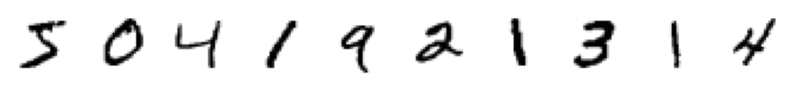

[5 0 4 1 9 2 1 3 1 4]


In [5]:
#오리지널 데이터 시각화
plt.figure(figsize=[10, 7])
for i in range(10) :
     plt.subplot(1, 10, (i  + 1))
     plt.imshow(x_train[i], cmap=plt.cm.gray_r)
     plt.axis("off")
plt.show()
print(y_train[:10])

In [6]:
# 클래스(레이블)의 종류 확인
# 클래스의 종류를 확인함으로써 분류 문제인지 회귀 문제인지 파악할 수 있고, 
# 분류 문제라면 몇가지 클래스로 구분되는지 알 수 있다. 
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [7]:
# 피쳐 데이터 차원 변경
# 오리지널 데이터의 차원은 (이미지갯수, 행, 열) 형태의 3차원 데이터로 표현이 돼 있지만 합성곱 신경망에 데이터를 넣으려면 4차원 형태로 구성해야한다. 
# 합성곱 신경망은 입력 데이터를 (이미지 갯수, 행, 열, 채널갯수) 형태로 구성해야 한다.
# 이때, 채널이란 RGB로 구분되는 것을 의미하는데 만약, 하나의 이미지 데이터를 R을 이용한 픽셀값, G를 이용한 픽셀값, B를 이용한 픽셀값으로 나타낼 때
# 채널 갯수는 3개가 된다.
# 하지만 MNIST 손글씨 데이터는 흑백 이미지이므로 채널 갯수는 1개가 된다. 
# 합성곱 신경망에 사용할 이미지 데이터는 reshape() 메소드를 이용해 (이미지 갯수, 행, 열, 채널갯수)형태로 변형한다.
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)

#피쳐 데이터 스케일 조정
# 이미지의 픽셀값은 0 - 255 사이에 있으므로  최소값이 0, 최대값이 1이 되도록 조정한다.  
# "/=" 대입 연산자를 사용했을 때 에러가 발생되면 "/"연산을 사용한다.
x_train = x_train / 255
x_test = x_test / 255

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [8]:
# 레이블 데이터 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[0], y_test[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


***
합성곱 신경망 모델을 만든다.
***

In [18]:
# Sequential() 객체 선언 후 Sequential 모델에 add() 메소드로 레이어를 추가해 신경망을 만든다.
model = Sequential() # 시퀀스를 사용하는 신경망 모델을 만든다.

# 입력 레이어를 만든다.
# 입력 레이어는 input_dim 또는 input_shape 속성으로 신경망에 입력되는 데이터의 모양(차원)을 지정해야한다. 
#  input_dim 속성은 입력 데이터가 벡터(1차원; 행 또는 열 단일)일 경우 사용하며 벡터를 구성하는 스칼라값의 갯수를 지정한다.
# input_shape 속성은 입력 데이터가 행렬(2차원)일 경우 
# filters 속성으로 출력되는 데이터의 출력 차원을 지정한다. ;  레이어를 구성하는 노드의 갯수를 지정한다.
# kernel_size 속성으로 커널의 크기를 지정한다.
# padding 속성으로 패딩 여부를 지정한다. 기본값은 "valid"로 패딩을 적용하지 않고, "same"은 패딩을 적용한다.
# activation 속성으로 활성화 함술르 지정한다.
# Conv2D 레이어의 
model.add(Conv2D(input_shape = (28, 28, 1), filters = 32, kernel_size = [5,  5], padding = "same", activation="relu"))

# 히든 레이어를 만든다.


# 출력 레이어를 만든다.



model.summary() # 신경망 모델의 구조를 확인한다.

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________
